# K-means method
clustering algorithm which is executed iteratively  
reference: https://pythondatascience.plavox.info/scikit-learn/%E3%82%AF%E3%83%A9%E3%82%B9%E3%82%BF%E5%88%86%E6%9E%90-k-means

In [1]:
import numpy as np
import pandas as pd
from sklearn import cluster
from matplotlib import pyplot as plt
%matplotlib inline

In [6]:
# datasets
data = pd.read_csv("http://pythondatascience.plavox.info/wp-content/uploads/2016/05/Wholesale_customers_data.csv")
del(data["Channel"])
del(data["Region"])

In [10]:
X = np.array([data["Fresh"].tolist(),
             data["Milk"].tolist(),
             data["Grocery"].tolist(),
             data["Frozen"].tolist(),
             data["Detergents_Paper"].tolist(),
             data["Delicassen"].tolist()], np.int32)

In [12]:
X = np.transpose(X)

In [22]:
# prediction
prediction = cluster.KMeans(n_clusters=4).fit_predict(X)

In [23]:
prediction

array([3, 0, 3, 3, 1, 3, 3, 3, 3, 0, 0, 3, 1, 0, 1, 3, 0, 3, 3, 3, 3, 3,
       1, 2, 1, 3, 3, 3, 0, 1, 3, 3, 3, 1, 3, 0, 1, 0, 0, 1, 1, 3, 0, 0,
       3, 0, 0, 2, 3, 0, 3, 3, 1, 0, 1, 3, 0, 0, 3, 3, 3, 2, 3, 0, 3, 2,
       3, 3, 3, 3, 3, 0, 3, 3, 3, 3, 3, 0, 3, 3, 3, 0, 0, 3, 3, 2, 2, 1,
       3, 1, 3, 3, 2, 3, 0, 3, 3, 3, 3, 3, 0, 0, 3, 1, 3, 3, 0, 0, 3, 0,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 3, 1, 3, 3,
       3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 1, 3, 3, 0, 3, 3, 3, 1, 3, 3, 3, 3,
       3, 0, 0, 3, 0, 0, 0, 3, 3, 0, 3, 0, 0, 3, 3, 3, 0, 0, 3, 0, 3, 0,
       1, 3, 3, 3, 3, 1, 0, 2, 3, 3, 3, 0, 0, 0, 3, 3, 3, 0, 3, 3, 1, 0,
       3, 3, 0, 0, 1, 3, 3, 0, 3, 3, 3, 0, 3, 2, 3, 3, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 1, 3, 3, 3, 3, 3, 3, 1, 1, 1,
       3, 3, 0, 0, 3, 3, 3, 3, 3, 2, 3, 1, 3, 1, 3, 3, 1, 1, 3, 3, 3, 3,
       0, 0, 0, 3, 0, 3, 3, 3, 3, 1, 3, 3, 1, 3, 3, 3, 3, 3, 1, 1, 1, 1,
       3, 3, 3, 1, 3, 3, 3, 0, 3, 3, 3, 3, 3, 3, 3,

In [25]:
# statistical value
data["cluster_id"] = prediction

In [26]:
data.head()

,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen,cluster_id
0,12669,9656,7561,214,2674,1338,3
1,7057,9810,9568,1762,3293,1776,0
2,6353,8808,7684,2405,3516,7844,3
3,13265,1196,4221,6404,507,1788,3
4,22615,5410,7198,3915,1777,5185,1


In [28]:
data[data["cluster_id"] == 0].mean()

Fresh                4808.842105
Milk                10525.010526
Grocery             16909.789474
Frozen               1462.589474
Detergents_Paper     7302.400000
Delicassen           1650.884211
cluster_id              0.000000
dtype: float64

In [29]:
data[data["cluster_id"] == 1].mean()

Fresh               36144.482759
Milk                 5471.465517
Grocery              6128.793103
Frozen               6298.655172
Detergents_Paper     1064.000000
Delicassen           2316.724138
cluster_id              1.000000
dtype: float64

In [30]:
data[data["cluster_id"] == 2].mean()

Fresh               19888.272727
Milk                36142.363636
Grocery             45517.454545
Frozen               6328.909091
Detergents_Paper    21417.090909
Delicassen           8414.000000
cluster_id              2.000000
dtype: float64

In [31]:
data[data["cluster_id"] == 3].mean()

Fresh               9087.463768
Milk                3027.427536
Grocery             3753.514493
Frozen              2817.985507
Detergents_Paper    1003.003623
Delicassen          1040.525362
cluster_id             3.000000
dtype: float64

In [34]:
# visualize
info = pd.DataFrame()
for i in range(0, 4):
    info["cluster_"+str(i)] = data[data["cluster_id"] == i].mean()
info = info.drop("cluster_id")

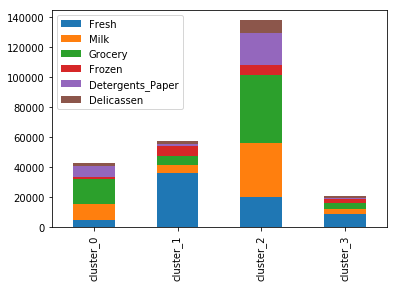

In [37]:
cl_plot = info.T.plot(kind='bar', stacked=True)